In [1]:
import pandas as pd

In [23]:
import dask_ml.cluster

In [29]:
import matplotlib.pyplot as plt

In [8]:
base = pd.read_csv('../data/standard.csv', index_col=0)

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
base.head()

,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate,turns,repetitions,size,seed
0,0,EvolvedLookerUp2_2_2,2.969925,0.704614,28.0,1.0,0.639084,0.065530,0.189481,0.105905,0.835714,0.480962,0.567606,0.800237,134.0,40.0,101.0,0.0
1,1,Evolved FSM 16 Noise 05,2.874888,0.696800,21.0,1.0,0.676353,0.020448,0.135146,0.168054,0.984542,0.570879,0.391926,0.069904,134.0,40.0,101.0,0.0
2,2,PSO Gambler 1_1_1,2.874216,0.684317,23.0,1.0,0.650701,0.033616,0.151543,0.164140,1.000000,0.283255,0.000000,0.135501,134.0,40.0,101.0,0.0
3,3,PSO Gambler Mem1,2.861493,0.705582,23.0,1.0,0.663295,0.042287,0.144599,0.149819,1.000000,0.510032,0.000000,0.122103,134.0,40.0,101.0,0.0
4,4,Winner12,2.834701,0.681854,20.0,1.0,0.650588,0.031267,0.140920,0.177226,1.000000,0.441175,0.000000,0.461920,134.0,40.0,101.0,0.0


In [10]:
base.tail()

,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate,turns,repetitions,size,seed
1198785,131,AntiCycler,1.953723,0.855670,41.0,1.000000,0.483042,0.372629,0.090733,0.053597,0.775380,0.835864,0.872346,0.980561,97.0,35.0,136.0,19589.0
1198786,132,Negation,1.936312,0.585039,46.0,0.485926,0.141358,0.443681,0.272717,0.142244,0.000000,1.000000,0.000000,1.000000,97.0,35.0,136.0,19589.0
1198787,133,Handshake,1.909355,0.099231,115.0,1.000000,0.040168,0.059063,0.220983,0.679786,0.866156,0.962581,0.000000,0.437668,97.0,35.0,136.0,19589.0
1198788,134,Hopeless,1.892173,0.739619,45.0,0.500106,0.257778,0.481841,0.215338,0.045042,0.000000,1.000000,1.000000,1.000000,97.0,35.0,136.0,19589.0
1198789,135,Anti Tit For Tat,1.864376,0.602332,40.0,1.000000,0.142301,0.460032,0.259373,0.138295,0.000000,1.000000,0.000000,1.000000,97.0,35.0,136.0,19589.0


In [13]:
df = pd.read_csv('../data/standard_with_extra.csv', index_col=0)

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
df.head()

,Unnamed: 0.1,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,...,turns,repetitions,size,seed,SSeeror,Stochastic,Memory_depth,Makes_use_of_game,Makes_use_of_length,Normalized_Rank
0,0,0,EvolvedLookerUp2_2_2,2.969925,0.704614,28.0,1.0,0.639084,0.065530,0.189481,...,134.0,40.0,101.0,0.0,0.660855,False,inf,False,False,0.00
1,1,1,Evolved FSM 16 Noise 05,2.874888,0.696800,21.0,1.0,0.676353,0.020448,0.135146,...,134.0,40.0,101.0,0.0,0.004933,False,inf,False,False,0.01
2,2,2,PSO Gambler 1_1_1,2.874216,0.684317,23.0,1.0,0.650701,0.033616,0.151543,...,134.0,40.0,101.0,0.0,0.139237,True,inf,False,False,0.02
3,3,3,PSO Gambler Mem1,2.861493,0.705582,23.0,1.0,0.663295,0.042287,0.144599,...,134.0,40.0,101.0,0.0,0.071396,True,1.0,False,False,0.03
4,4,4,Winner12,2.834701,0.681854,20.0,1.0,0.650588,0.031267,0.140920,...,134.0,40.0,101.0,0.0,0.286849,False,2.0,False,False,0.04


In [15]:
df.tail()

,Unnamed: 0.1,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,...,turns,repetitions,size,seed,SSeeror,Stochastic,Memory_depth,Makes_use_of_game,Makes_use_of_length,Normalized_Rank
1198785,1198785,131,AntiCycler,1.953723,0.855670,41.0,1.000000,0.483042,0.372629,0.090733,...,97.0,35.0,136.0,19589.0,1.218516,False,inf,False,False,0.970370
1198786,1198786,132,Negation,1.936312,0.585039,46.0,0.485926,0.141358,0.443681,0.272717,...,97.0,35.0,136.0,19589.0,1.529412,True,1.0,False,False,0.977778
1198787,1198787,133,Handshake,1.909355,0.099231,115.0,1.000000,0.040168,0.059063,0.220983,...,97.0,35.0,136.0,19589.0,0.197831,False,inf,False,False,0.985185
1198788,1198788,134,Hopeless,1.892173,0.739619,45.0,0.500106,0.257778,0.481841,0.215338,...,97.0,35.0,136.0,19589.0,2.470588,True,1.0,False,False,0.992593
1198789,1198789,135,Anti Tit For Tat,1.864376,0.602332,40.0,1.000000,0.142301,0.460032,0.259373,...,97.0,35.0,136.0,19589.0,1.529412,False,1.0,False,False,1.000000


In [16]:
len(base), len(df)

(1198790, 1198790)

In [17]:
ddf = pd.read_csv('../data/standard_processed.csv')

In [18]:
len(ddf)

1198423

In [19]:
ddf.tail()

,Unnamed: 0,Unnamed: 0.1,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,...,turns,repetitions,size,seed,SSeeror,Normalized_Rank,Stochastic,Memory_depth,Makes_use_of_game,Makes_use_of_length
1198418,1198785,1198785,131,AntiCycler,1.953723,0.855670,41.0,1.000000,0.483042,0.372629,...,97.0,35.0,136.0,19589.0,1.218516,0.970370,AntiCycler,False,inf,False
1198419,1198786,1198786,132,Negation,1.936312,0.585039,46.0,0.485926,0.141358,0.443681,...,97.0,35.0,136.0,19589.0,1.529412,0.977778,Negation,True,1.0,False
1198420,1198787,1198787,133,Handshake,1.909355,0.099231,115.0,1.000000,0.040168,0.059063,...,97.0,35.0,136.0,19589.0,0.197831,0.985185,Handshake,False,inf,False
1198421,1198788,1198788,134,Hopeless,1.892173,0.739619,45.0,0.500106,0.257778,0.481841,...,97.0,35.0,136.0,19589.0,2.470588,0.992593,Hopeless,True,1.0,False
1198422,1198789,1198789,135,Anti Tit For Tat,1.864376,0.602332,40.0,1.000000,0.142301,0.460032,...,97.0,35.0,136.0,19589.0,1.529412,1.000000,Anti Tit For Tat,False,1.0,False


In [20]:
columns = ['Normalized_Rank', 'Median_score', ]

In [31]:
data = ddf[columns].as_matrix()

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
for n_clusters in range(2, 3):
    kmeans = dask_ml.cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    ddf['Clusters: n = %s' % n_clusters] = kmeans.labels_

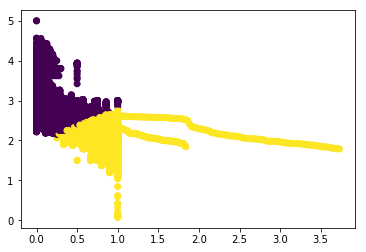

In [34]:
plt.figure()
plt.scatter(df['Normalized_Rank'], df['Median_score'], c=df['Clusters: n = 2']);

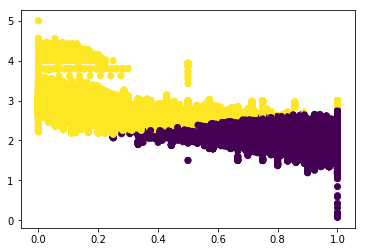

In [35]:
plt.figure()
plt.scatter(ddf['Normalized_Rank'], ddf['Median_score'], c=ddf['Clusters: n = 2']);

In [41]:
import dask.dataframe as dd

In [46]:
dddf = dd.from_pandas(ddf, npartitions=16)

In [47]:
data = dddf[columns].compute()

In [48]:
for n_clusters in range(2, 3):
    kmeans = dask_ml.cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    dddf['Clusters: n = %s' % n_clusters] = dd.from_dask_array(kmeans.labels_)

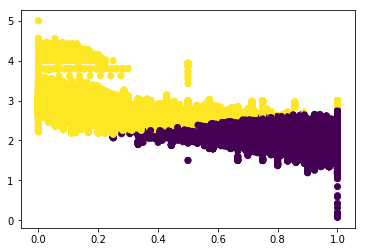

In [50]:
plt.figure()
plt.scatter(dddf['Normalized_Rank'].compute(),
            dddf['Median_score'].compute(),
            c=dddf['Clusters: n = 2'].compute());